# Runge-Kutta Methods (RK4)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def integrate(F, x, y, xStop, h):

    def run_rk4(F, x, y, h):
        k1 = h * F(x, y)
        k2 = h * F(x + h / 2, y + k1 / 2)
        k3 = h * F(x + h / 2, y + k2 / 2)
        k4 = h * F(x + h, y + k3)

        return (k1 + 2 * k2 + 2 * k3 + k4) / 6, k1, k2, k3, k4
    
    X = []
    Y = []
    K1 = []
    K2 = []
    K3 = []
    K4 = []
    X.append(x)
    Y.append(y)
    K1.append(y)
    K2.append(y)
    K3.append(y)
    K4.append(y)

    while x < xStop:
        h = min(h, xStop - x) # choose step size always less than or equal to the distance to xStop
        rk4, k1, k2, k3, k4 = run_rk4(F, x, y, h)
        y = y + rk4
        x = x + h
        X.append(x)
        Y.append(y)
        K1.append(k1)
        K2.append(k2)
        K3.append(k3)
        K4.append(k4)
        
    return np.array(X), np.array(Y), np.array(K1), np.array(K2), np.array(K3), np.array(K4)

In [4]:
def F(x, y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -0.1*y[1] - x
    
    return F

In [5]:
x = 0
xStop = 2
y = np.array([0, 1])  # initial conditions
h = 0.2

In [6]:
F(x, y)

array([ 1. , -0.1])

In [40]:
X, Y, K1, K2, K3, K4 = integrate(F, x, y, xStop, h)

In [24]:
yExact = 100*X - 5*X**2 + 990*(np.exp(-0.1*X) - 1)

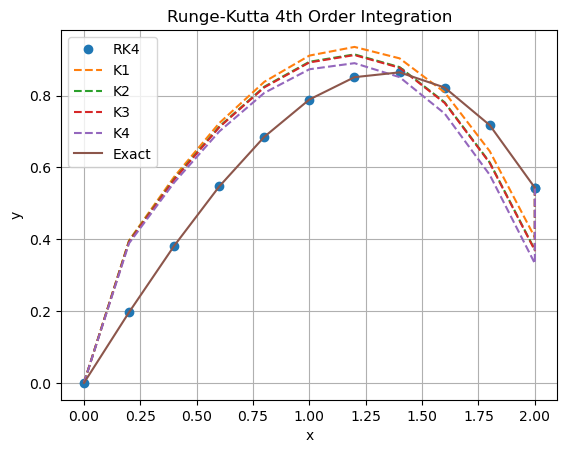

In [48]:
plt.plot(X, Y[:, 0], label='RK4', marker='o', linestyle='None')
plt.plot(X, K1[:, 0]+Y[:, 0], label='K1', linestyle='--')
plt.plot(X, K2[:, 0]+Y[:, 0], label='K2', linestyle='--')
plt.plot(X, K3[:, 0]+Y[:, 0], label='K3', linestyle='--')
plt.plot(X, K4[:, 0]+Y[:, 0], label='K4', linestyle='--')
plt.plot(X, yExact, label='Exact', linestyle='-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Runge-Kutta 4th Order Integration')
plt.legend()
plt.grid()